In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
konacna_tabela = pd.read_csv("konacna_tabela.csv")
konacna_tabela

,Tip,ID,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Patogenost
0,C,NC_017626,991,597,601,748,566,499,563,429,...,486,784,802,786,656,589,798,658,1009,NaN
1,C,NC_017626,1455,1371,807,1185,1196,1234,1191,851,...,930,1371,1490,1273,860,929,1201,969,1395,NaN
2,C,NC_017626,1058,555,443,988,462,301,214,424,...,523,511,380,278,417,762,656,517,1178,NaN
3,C,NC_017626,589,393,311,435,401,335,257,295,...,321,432,402,315,334,331,465,287,489,NaN
4,C,NC_017626,1577,1192,804,1389,917,1006,997,727,...,894,1153,1273,935,861,1173,1314,993,1894,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,R,NC_017907,2472,1409,1229,1547,1418,1008,1087,1012,...,1088,1938,1587,1738,1313,1405,1321,1183,1872,NaN
755,K,NC_017652,118917,89834,68419,91041,65597,80681,78544,54796,...,61187,91360,102999,92260,65108,74986,91200,82784,119309,NaN
756,R,NC_017652,108887,82463,63082,83228,59076,74385,72637,49742,...,55380,83033,94947,85288,58964,68216,83589,76690,109253,NaN
757,K,NC_017651,118918,89834,68420,91040,65598,80682,78544,54795,...,61187,91358,102996,92261,65108,74986,91200,82784,119309,NaN


In [25]:
genoms = ['NC_017626', 'NC_017627', 'NC_013364', 'NC_013365', 'NC_013366', 'NC_013361', 'NC_013369', 
          'NC_013353', 'NC_013354', 'NC_018650', 'NC_018654', 'NC_018661', 'NC_018662', 'NC_018658', 
          'NC_018659', 'NC_018666', 'NC_008253', 'NC_011748', 'NC_017631', 'NC_008563', 'NC_009837', 
          'NC_009838', 'NC_020163', 'NC_010468', 'NC_012892', 'NC_012971', 'NC_013941', 'NC_017646', 
          'NC_004431', 'NC_017625', 'NC_017638', 'NC_011601', 'NC_009786', 'NC_009788', 'NC_009790', 
          'NC_009801', 'NC_011353', 'NC_011745', 'NC_002655', 'NC_007414', 'NC_017633', 'NC_012947', 
          'NC_009800', 'NC_011741', 'NC_011750', 'NC_017628', 'NC_007779', 'NC_010473', 'NC_012759', 
          'NC_020518', 'NC_000913', 'NC_016902', 'NC_016904', 'NC_017660', 'NC_011993', 'NC_022364', 
          'NC_017644', 'NC_017634', 'NC_017659', 'NC_017663', 'NC_022370', 'NC_012967', 'NC_017656', 
          'NC_017657', 'NC_011742', 'NC_011747', 'NC_011415', 'NC_011419', 'NC_013654', 'NC_013655', 
          'NC_010488', 'NC_010498', 'NC_002128', 'NC_002695', 'NC_013008', 'NC_013010', 'NC_017630', 
          'NC_017632', 'NC_011739', 'NC_011749', 'NC_011751', 'NC_017639', 'NC_017641', 'NC_017642', 
          'NC_017645', 'NC_007941', 'NC_007946', 'NC_017635', 'NC_017637', 'NC_017664', 'NC_017665', 
          'NC_017906', 'NC_017907', 'NC_017652', 'NC_017651']

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


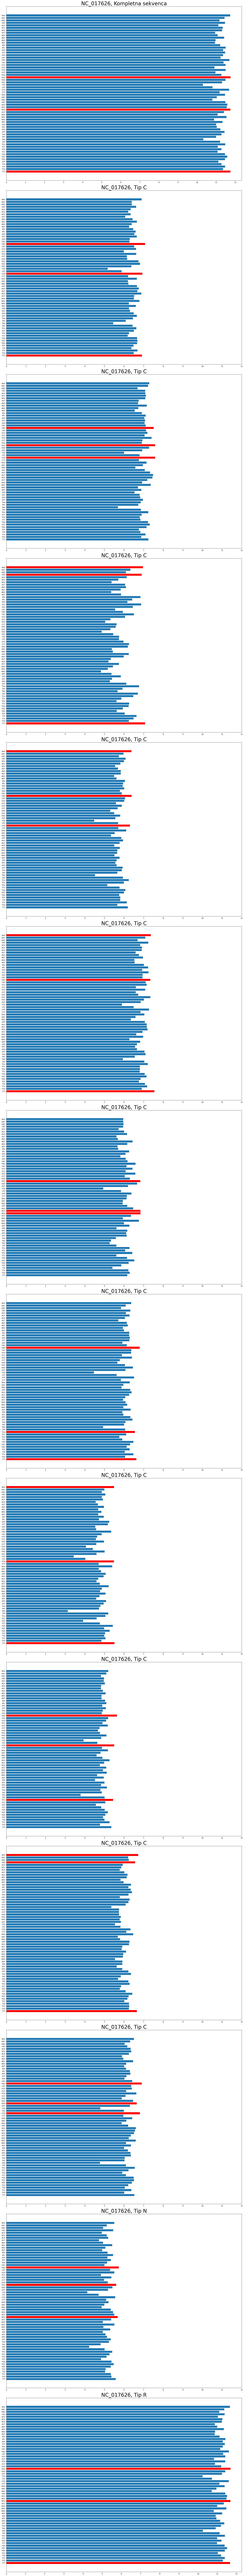

In [24]:
tabela = konacna_tabela.copy()

for genom in genoms:
    id_group = tabela[tabela['ID'] == genom]
    
    if len(id_group) == 1:
        redovi = 2
    else:
        redovi = len(id_group)

    fig, axs = plt.subplots(redovi, 1, figsize=(20, 15 * len(id_group)))
   
    # podela podataka na tip "K" i ostale tipove
    tip_k = id_group[id_group['Tip'] == 'K']
    ostali_tipovi = id_group[id_group['Tip'] != 'K']

    max_value = 0

    for i, (index, row) in enumerate(tip_k.iterrows()):
        row_without_id_type = row.drop(['ID', 'Tip', 'Patogenost'])

        row_without_id_type = row_without_id_type.astype(int)
        top3_values = row_without_id_type.nlargest(3)

        axs[i].barh(row_without_id_type.index, np.log(row_without_id_type)) 
        axs[i].barh(top3_values.index, np.log(top3_values), color='red') 

        axs[i].set_title(f'{row["ID"]}, Kompletna sekvenca', fontsize=30)

        axs[i].invert_yaxis()

        max_value = max(max_value, np.max(np.log(row_without_id_type)))

    if not ostali_tipovi.empty:
        for j, (index, row) in enumerate(ostali_tipovi.iterrows()):
            i += 1
            row_without_id_type = row.drop(['ID', 'Tip', 'Patogenost'])
            row_without_id_type = row_without_id_type.astype(int)
            top3_values = row_without_id_type.nlargest(3)

            axs[i].barh(row_without_id_type.index, np.log(row_without_id_type)) 
            axs[i].barh(top3_values.index, np.log(top3_values), color='red') 

            axs[i].set_title(f'{row["ID"]}, Tip {row["Tip"]}', fontsize=30)

            axs[i].invert_yaxis()

            max_value = max(max_value, np.max(np.log(row_without_id_type)))

    ticks = np.arange(0, max_value + 1, 1)
    for ax in axs:
        ax.set_xticks(ticks)

    plt.tight_layout()
    #plt.savefig(f'{genom}/grafikoni.png')
    plt.show()
